### Część 4 - regresja wielomianowa

In [3]:
#dostawić do importów z wcześniejszych części
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

In [5]:
#to jest tylko na potrzeby tego notebooka, normalnie będzie wcześniej
df_data = pd.read_csv("../datasets/final_data.csv")
df_data['date'] = pd.to_datetime(df_data['date'])
df_data = df_data.sort_values('date')
df_europe = df_data[df_data['Continent'] == 'Europe'].copy()

Przygotowanie danych - filtracja i zamiast formatu date liczymy datę jako liczba dni od pierwszego dnia z naszego zbioru.

In [7]:
df_Norway = df_europe[df_europe[('Country_name')] == 'Norway'].copy()
df_Norway['days'] = (df_Norway['date'] - df_Norway['date'].min()).dt.days
kolumny = {
    'Nowe zachorowania': 'Total_confirmed_cases',
    'Nowe zgony': 'Total_new_deceased',
    'Nowe szczepienia': 'Total_new_vaccinations',
    'Nowe pełne szczepienia': 'New_persons_fully_vaccinated',
    'Nowe testy': 'Total_tested'
}

Funkcja do badania regresji

Do porównywania stopniu wielomianów oraz regresji liniowej korzystamy z:
 - współczynnika determinacji R^2, który  jaka część całkowitej zmienności wartości rzeczywistych jest wyjaśniona przez model <br>
(1 = idealne dopasowanie, 0 = model nic nie wyjaśnia, -1 = model jest gorszy niż losowanie).

- MSE - błąd średniokwadratowy - średnia z kwadratów różnic między wartościami rzeczywistymi a przewidywanymi przez model.

In [9]:
def analyze_polynomial_regression(df, feature_col, name, max_degree=15):
    X = df[['days']].values
    y = df[feature_col].fillna(0).values

    results = []

    for degree in range(1, max_degree + 1):
        poly = PolynomialFeatures(degree)
        X_poly = poly.fit_transform(X)

        model = LinearRegression()
        model.fit(X_poly, y)
        y_pred = model.predict(X_poly)

        r2 = r2_score(y, y_pred)
        mse = mean_squared_error(y, y_pred)
        results.append((degree, r2, mse, y_pred))

    best = max(results, key=lambda x: x[1])  # najlepsze R²
    best_degree, best_r2, best_mse, best_pred = best

    # model liniowy dla porównania
    model_lin = LinearRegression()
    model_lin.fit(X, y)
    y_lin_pred = model_lin.predict(X)
    lin_r2 = r2_score(y, y_lin_pred)
    lin_mse = mean_squared_error(y, y_lin_pred)


    # wykres
    plt.figure(figsize=(10, 5))
    plt.plot(df['date'], y, label='Rzeczywiste dane', color='black')
    plt.plot(df['date'], best_pred, label=f'Regresja wielomianowa (stopień {best_degree})', color='blue')
    plt.plot(df['date'], y_lin_pred, label='Regresja liniowa', color='red')
    plt.title(f'{name} - analiza regresji')
    plt.xlabel('Data')
    plt.ylabel(name)
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"{name} — najbardziej dopasowany jest wielomian stopnia {best_degree}")
    print("\nModel wielomianowy vs liniowy:\n")
    print(f"   R² dla modelu liniowego: {lin_r2:.4f}")
    print(f"   R² dla modelu wielomianowego: {best_r2:.4f}\n")
    print(f"   MSE modelu wielomianowego: {best_mse:.2f}")
    print(f"   MSE modelu liniowego: {lin_mse:.2f}\n")

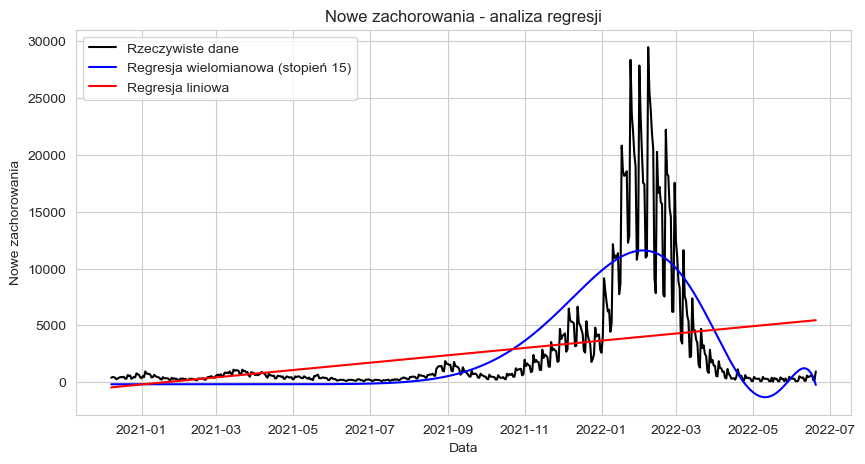

Nowe zachorowania — najbardziej dopasowany jest wielomian stopnia 15

Model wielomianowy vs liniowy:

   R² dla modelu liniowego: 0.1174
   R² dla modelu wielomianowego: 0.6428

   MSE modelu wielomianowego: 8800125.15
   MSE modelu liniowego: 21740357.76



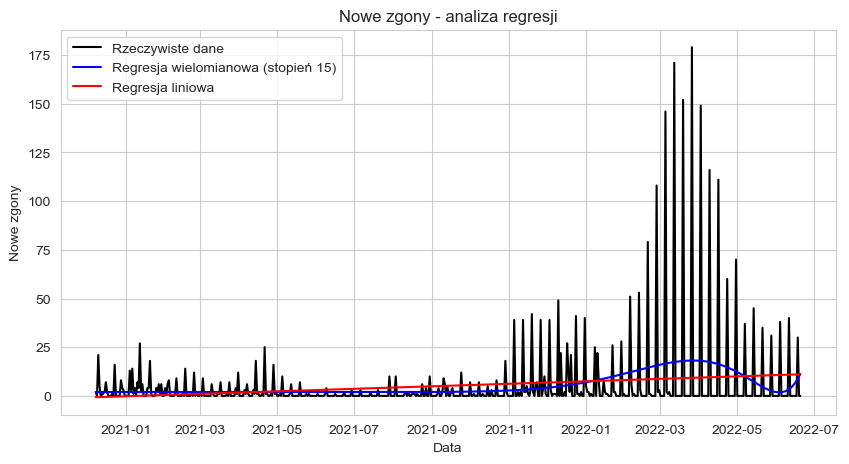

Nowe zgony — najbardziej dopasowany jest wielomian stopnia 15

Model wielomianowy vs liniowy:

   R² dla modelu liniowego: 0.0312
   R² dla modelu wielomianowego: 0.0727

   MSE modelu wielomianowego: 340.30
   MSE modelu liniowego: 355.53



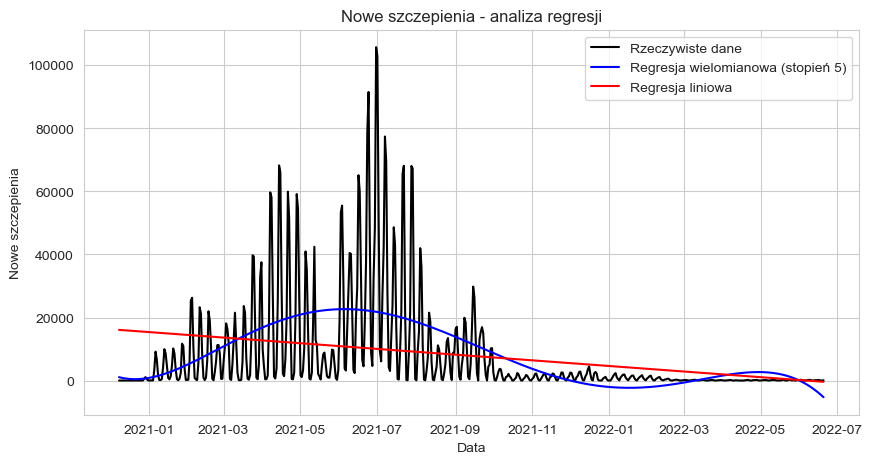

Nowe szczepienia — najbardziej dopasowany jest wielomian stopnia 5

Model wielomianowy vs liniowy:

   R² dla modelu liniowego: 0.0907
   R² dla modelu wielomianowego: 0.3087

   MSE modelu wielomianowego: 171319327.99
   MSE modelu liniowego: 225321100.51



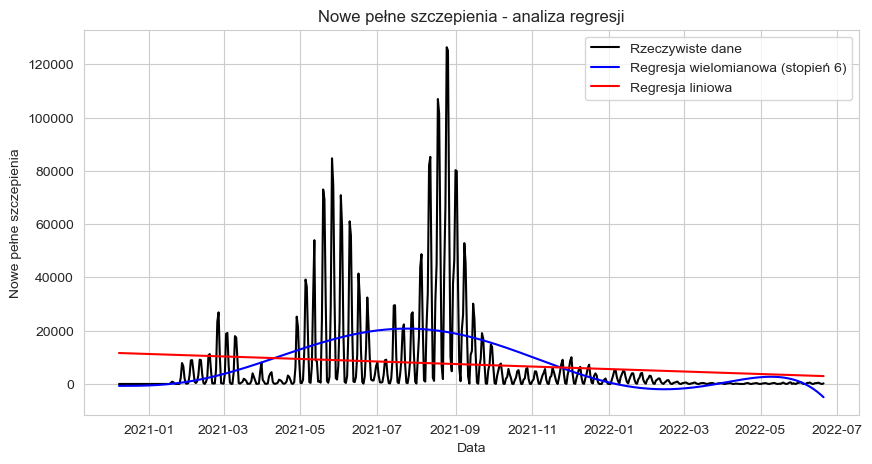

Nowe pełne szczepienia — najbardziej dopasowany jest wielomian stopnia 6

Model wielomianowy vs liniowy:

   R² dla modelu liniowego: 0.0220
   R² dla modelu wielomianowego: 0.2258

   MSE modelu wielomianowego: 218315472.62
   MSE modelu liniowego: 275786670.59



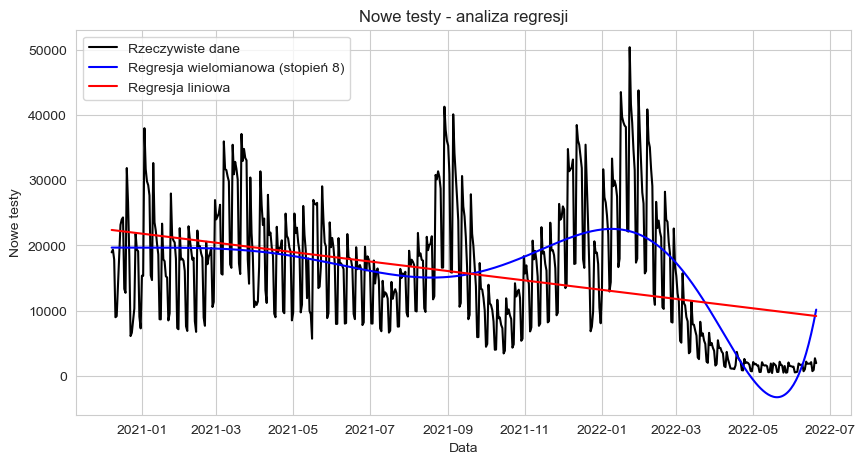

Nowe testy — najbardziej dopasowany jest wielomian stopnia 8

Model wielomianowy vs liniowy:

   R² dla modelu liniowego: 0.1388
   R² dla modelu wielomianowego: 0.4153

   MSE modelu wielomianowego: 60720899.44
   MSE modelu liniowego: 89434733.57



In [10]:
for name, feature_col in kolumny.items():
    analyze_polynomial_regression(df_Norway, feature_col, name)

### Wnioski:
- R² w każdym przypadku jest większe dla modelu wielomianowego niż liniowego.
- MSE w każdym przypadku jest większe dla modelu liniowego niż wielomianowego.
- Oznacza to, że w każdym przypadku regresja wielomianowa jest lepszym rozwiązaniem.
- Najlepiej dopasowane do regresji wielomianowej są nowe zachorowania (R²=0,64), nowe testy mają także niezły wynik (R²=0,42).
- Szczepienia i pełne szczepienia są gorzej dopasowane, ale mimo wszystko regresja wielomianowa pokazuje główny trend (R²=0,31 i R²=0,23).
- Nowe śmierci mają znikome dopasowanie nawet dla regresji wielomianowej (R²=0,07), ale nawet w takim słabym przypadku poradziła ona sobie lepiej od regresji liniowej.